Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
以下程式可以把圖片轉成山水畫
以下為控制邊緣偵測的數值
請輸入參數a(minvalue),不推薦超過30：15
請輸入參數b(maxvalue),不推薦超過30：15


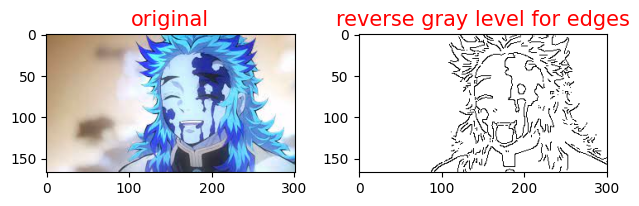

是否要重新輸入參數a跟b 要:1不要:2 值: 2
請輸入參數a(控制刪除的半徑),不推薦超過10：5


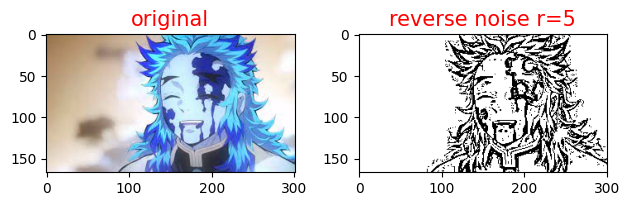

要返回上個步驟 還是要不要重新輸入參數a 返回:1 要:2 不要:3  值:1
以下為控制邊緣偵測的數值
請輸入參數a(minvalue),不推薦超過30：20
請輸入參數b(maxvalue),不推薦超過30：20


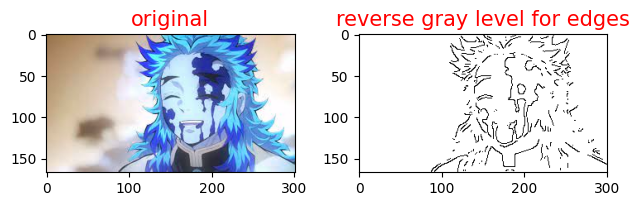

是否要重新輸入參數a跟b 要:1不要:2 值: 2
請輸入參數a(控制刪除的半徑),不推薦超過10：9


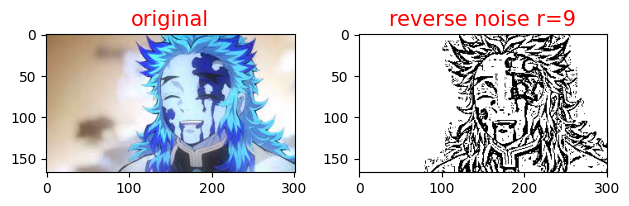

要返回上個步驟 還是要不要重新輸入參數a 返回:1 要:2 不要:3  值:2
請輸入參數a(控制刪除的半徑),不推薦超過10：1


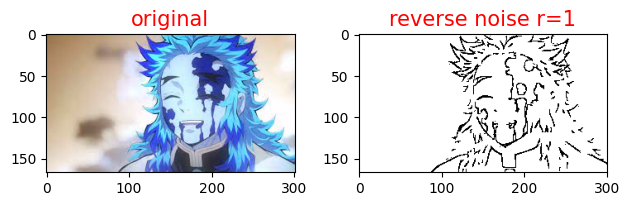

要返回上個步驟 還是要不要重新輸入參數a 返回:1 要:2 不要:3  值:3
演示結束


In [20]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import time
drive.mount('/content/drive')
def change(img):  #對影像灰階值做倒數
    nr, nc = img.shape[:2]
    new_img = np.zeros((nr, nc), np.uint8)  #建立一新影像且灰階值為0

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:  #若傳進來的影像目前位置灰階值為0，則新影像同樣位置灰階值設為1
                new_img[x][y] = 255

    return new_img  #回傳該影像
def reduce_noise(img, edges, radius):  #若灰階影像中各相素點半徑(radius)內邊緣影像有值則將其保留，若否則將該相素點刪除
    nr, nc = img.shape[:2]
    new_img = img.copy()  #複製一新影像
    has_edges = 0  #檢測半徑內是否有邊緣資訊
    edges_x = edges_y = 0  #紀錄半徑內的X,Y軸的值

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:
                for round_x in range(2 * radius + 1):  #檢測目前位置加上或減去半徑後是否會超過影像範圍
                    for round_y in range(2 * radius + 1):
                        if (x - radius + round_x) < 0:
                            edges_x = 0

                        elif (x - radius + round_x) >= nr:
                            edges_x = nr - 1

                        else:
                            edges_x = x - radius + round_x

                        if (y - radius + round_y) < 0:
                            edges_y = 0

                        elif (y - radius + round_y) >= nc:
                            edges_y = nc - 1

                        else:
                            edges_y = y - radius + round_y

                        if edges[edges_x][edges_y] == 0:  #若在半徑內有邊緣資訊，則記錄有邊緣
                          has_edges = 1

            if has_edges == 0:  #若半徑內無邊緣資訊則將新影像的該點的灰階值設為255
                new_img[x][y] = 255

            has_edges = 0
    return new_img
img = cv2.imread("/content/drive/My Drive/a.jpg", -1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
menu=1
print("以下程式可以把圖片轉成山水畫")
while 1:
  if menu==1:
    print("以下為控制邊緣偵測的數值")
    a=int(input("請輸入參數a(minvalue),不推薦超過30："))
    b=int(input("請輸入參數b(maxvalue),不推薦超過30："))
    a=a*10
    b=b*10
    edges_img = cv2.Canny(gaussian_img, a, b)#影像邊緣偵測
    edges_img= change(edges_img)  #影像邊緣偵測
    imgs=[img,edges_img]
    titles=['original','reverse gray level for edges']
    for i in range(2):
      plt.subplot(1,2,i+1)
      plt.title(titles[i], fontsize=15, color = 'r')
      plt.imshow(imgs[i], cmap = 'gray')
    plt.tight_layout()
    plt.show()
    time.sleep(5)
    control=int(input("是否要重新輸入參數a跟b 要:1不要:2 值: "))
    if control<=2 and control>=1 :
      menu=control
    else:
      print("輸入錯誤請重試")

  if menu==2:
    adaptive_theshold_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)#將影像透過高斯法的適應性閥值化來將灰階影像變為只有黑白兩色
    c=int(input("請輸入參數a(控制刪除的半徑),不推薦超過10："))
    reduce_noise_img = reduce_noise(adaptive_theshold_gaussian, edges_img, c)  #透過邊緣資訊來將不必要的地方刪除
    imgs=[img,reduce_noise_img]
    titles=['original','reverse noise r='+str(c)]
    for i in range(2):
      plt.subplot(1, 2, i+1)
      plt.title(titles[i], fontsize = 15, color = 'r')
      plt.imshow(imgs[i], cmap = 'gray')
    plt.tight_layout()
    plt.show()
    time.sleep(10)
    control=int(input("要返回上個步驟 還是要不要重新輸入參數a 返回:1 要:2 不要:3  值:"))
    if control<=3 and control>=1:
      menu=control
    else:
      print("輸入錯誤請重試")
  if menu==3:
    break
print("演示結束")